# Homework 5

## Math Tools for Neural and Cognitive Science

Reuben Feinman

11/26/2017

In [1]:
from __future__ import division, print_function
import math
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

np.random.seed(0)

# Problem #1

## (a)

In [14]:
# Generate 10,000 samples, each of size 10
X = np.random.normal(size=(10000, 10))
# Compute the average of each set of 10
means = X.mean(axis=1)

In [15]:
def histogram_continuous(samples, title=None, nbins=10, xlim=None):
    """
    A function that takes an array of numeric values and
    plots a histogram of the values, discretized into some
    pre-specified number of bins.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=nbins)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.xlabel('Value', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()

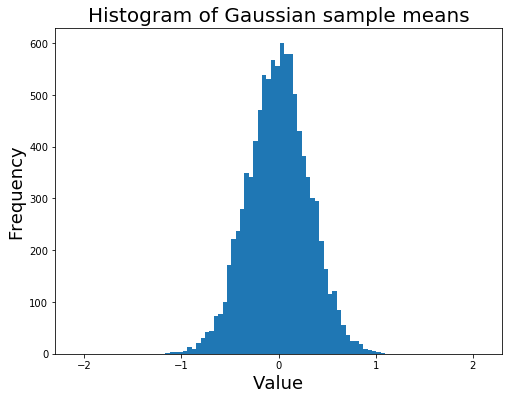

In [16]:
# Now plot a histogram of our averages, with 50 bins
histogram_continuous(
    means, 
    title='Histogram of Gaussian sample means', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

The histogram should look like a Gaussian curve, as it does. The central limit theorem says that the distribution of the sample means always converges to a Gaussian as $n$ grows large, regardless of the sample distribution. Here we have $n=10$, which is sufficiently large for a Gaussian-looking curve.

Recall from HW4 that, for a collection of $n$ samples drawn from $\mathcal{N}(\mu, \sigma)$, the distribution of averages converges to $\mathcal{N}(\mu, \sigma/\sqrt{n})$ as $n$ grows sufficiently large. Since the standard deviation convergences to $\sigma/\sqrt{n}$, the variance (std-dev squared) converges to $\sigma^2/n$.
Thus, since we are drawing 10 samples from a distribution with $\sigma=1$, our averages converge to a Gaussian w/ variance $1^2/10 = 0.1$. Let's check that this matches our empirical variance:

In [17]:
means.var()

0.098558981398902457

It matches within reasonable precision error.

## (b)

In [6]:
# Compute the medians of our sample sets
medians = np.median(X, axis=1)

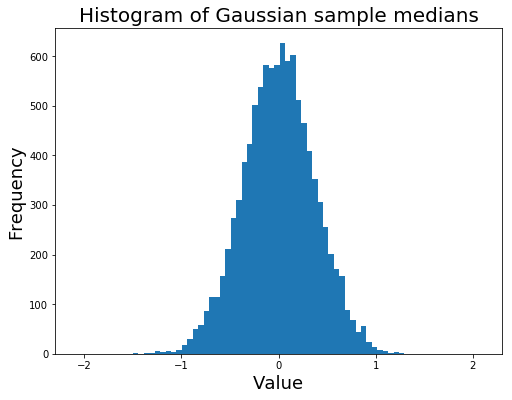

In [7]:
# Now plot a histogram of our means, with 50 bins
histogram_continuous(
    medians, 
    title='Histogram of Gaussian sample medians', 
    nbins=50, 
    xlim=[-2.3, 2.3]
)

This curve again has a Gaussian-like shape, similar to the distribution of means. Let's use the Q-Q plot to compare it to the normal distribution:

In [8]:
from scipy import stats

def normplot(x, title=None):
    """
    A function to replicate Matlab's "normplot" functionality. Takes
    a set of points and displays the Q-Q plot for these points.
    """
    plt.figure(figsize=(10,8))
    # Calculate quantiles and least-square-fit curve
    (quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')
    # Plot results
    plt.plot(values, quantiles,'ob', marker='+')
    plt.plot(quantiles * slope + intercept, quantiles, 'r')
    #define ticks
    ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
    # Transfrom them from precentile to cumulative density
    ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
    # Assign new ticks
    plt.yticks(ticks_quan,ticks_perc)
    if title is not None:
        plt.title(title, fontsize=20)
    plt.ylabel('Probability (%)', fontsize=18)
    plt.xlabel('Data', fontsize=18)
    plt.show()

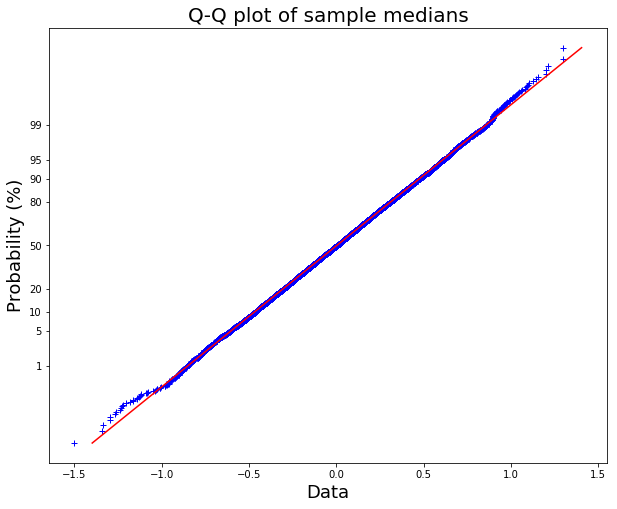

In [9]:
# Show the Q-Q plot
normplot(medians, title='Q-Q plot of sample medians')

No, the distribution of medians does not deviate significantly - it looks approximately Normal (points are a straight line).

## (c)

In [10]:
def compute_min_max_means(X):
    """
    A helper function that takes a data set of size 
    (nb_trials, nb_samples_per_trial) and computes, 
    for each trial, the mean of the max and min for
    that trial.
    """
    # Compute the max for each sample
    maxs = X.max(axis=1).reshape(-1,1)
    # Compute the min for each sample
    mins = X.min(axis=1).reshape(-1,1)
    # Concatenate max and min of each sample along an axis so 
    # that averages can be computed easily
    conc = np.concatenate((maxs, mins), axis=1)
    # Compute min,max average for each sample
    min_max_means = conc.mean(axis=1)
    
    return min_max_means

In [11]:
min_max_means = compute_min_max_means(X)

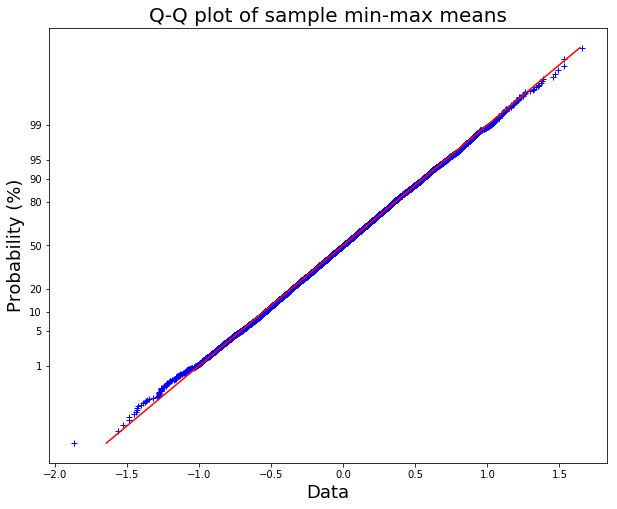

In [12]:
# Show the Q-Q plot
normplot(min_max_means, title='Q-Q plot of sample min-max means')

Once again, our distribution looks approximately normal for the min-max means. The points fall on a straight line in the Q-Q plot.

## (d)

In [13]:
# Generate 10,000 samples, each of size 256
X = np.random.normal(size=(10000, 256))

In [14]:
# For each sample size, compute the estimator values; these
# will be size (10000,) in each case.
grid = [8, 16, 32, 64, 128, 256]
mean_vars = []
median_vars = []
mmm_vars = []
for nb_samples in grid:
    means = X[:,:nb_samples].mean(axis=1)
    medians = np.median(X[:,:nb_samples], axis=1)
    min_max_means = compute_min_max_means(X[:,:nb_samples])
    mean_vars.append(means.var())
    median_vars.append(medians.var())
    mmm_vars.append(min_max_means.var())

In [15]:
# Now compute theoretical variance values of our average estimator
# for each n
theoretical_vars = [1/n for n in grid]

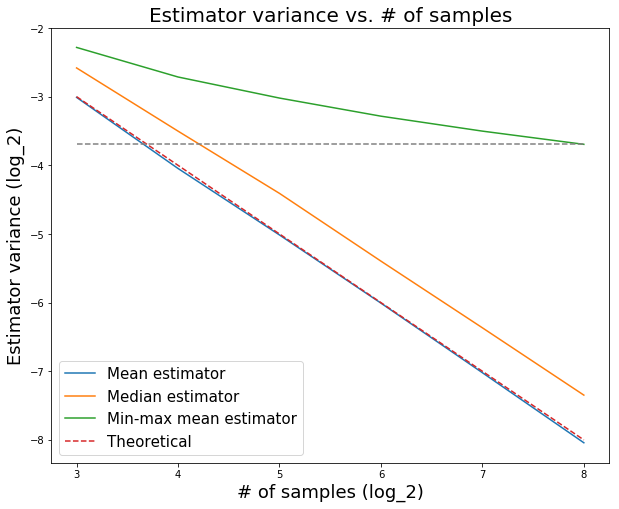

In [16]:
# Now show the plots
plt.figure(figsize=(10, 8))
plt.plot(np.log2(grid), np.log2(mean_vars), label='Mean estimator')
plt.plot(np.log2(grid), np.log2(median_vars), label='Median estimator')
plt.plot(np.log2(grid), np.log2(mmm_vars), label='Min-max mean estimator')
plt.plot(np.log2(grid), np.log2(theoretical_vars), '--', label='Theoretical')
plt.plot(np.log2(grid), np.log2([mmm_vars[-1] for _ in mmm_vars]), '--', color='grey')
plt.legend(prop={'size': 15})
plt.title('Estimator variance vs. # of samples', fontsize=20)
plt.xlabel('# of samples (log_2)', fontsize=18)
plt.ylabel('Estimator variance (log_2)', fontsize=18)
plt.show()

Note that the theoretical values and the mean estimator values overlap; I used a dashed line to help distinguish the theoretical values.

In [17]:
print('%0.2f' % math.pow(2,3.8))
print('%0.2f' % math.pow(2,4.3))

13.93
19.70


The mean and median estimators converge at the same rate (i.e. have the same line slope), however, the median estimator has a larger y-intercept: it is about 0.5 units higher than the mean estimator at all times (on $log_2(x)$ scale). The min-max mean estimator, on the other hand, converges at a slower rate than the other two. To achieve the same variance that the min-max mean estimator gets at $n=256$ (or $n=8$ on the $log_2(x)$ scale), we can see on the graph (dashed grey line) that the median estimator would need $n = 2^{4.3} \sim 20$, and the mean estimator would need $n = 2^{3.8} \sim 14$. Thus they would require many fewer samples.

# Problem #2

## (a)

Let $A$ denote the event that we have activation in the Broca area of a human subject, and $L$ the event that the subject is using language (denote the inverse case, no language, as $NL$). We assume that the conditional distributions $P(A \mid L)$ and $P(A \mid NL)$ are both Bernoulli distributions, each parameterized by occurance probabilities $x_l$ and $x_{nl}$, respectively:

$A \mid L \sim Bernoulli(x_l)$ 

$A \mid NL\sim Bernoulli(x_{nl})$.

Recall that the probability of $k$ successes given $n$ samples from a Bernoulli distribution with success probability $p$ is equal to 

$P(k) = \binom{n}{k} p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k}$,

the well-known Binomial distribution. Thus in our case, we have

P(103 activated of 869 | L) = $\frac{869!}{103!*766!} x_l^{103}(1-x_l)^{766}$,

P(199 activated of 2353 | NL) = $\frac{2353!}{199!*2154!} x_{nl}^{199}(1-x_{nl})^{2154}$.

In [18]:
# Write Python functions to evaluate these two expressions, P(A | L) and P(A | NL),
# for different binomial p values.

def likelihood_l(x_l):
    assert 0 <= x_l <= 1
    n_choose_k = math.factorial(869)/(math.factorial(103)*math.factorial(766))
    likelihood = n_choose_k*math.pow(x_l, 103)*math.pow(1-x_l, 766)
    assert 0 <= likelihood <= 1
    
    return likelihood

def likelihood_nl(x_nl):
    assert 0 <= x_nl <= 1
    n_choose_k = math.factorial(2353)/(math.factorial(199)*math.factorial(2154))
    likelihood = n_choose_k*math.pow(x_nl, 199)*math.pow(1-x_nl, 2154)
    assert 0 <= likelihood <= 1
    
    return likelihood

In [59]:
# For x = [0:0.001:1], compute likelihoods of language-engaged 
# and non-language-engaged observations
x = np.linspace(0, 1, 1001)
p_l = [likelihood_l(x_l) for x_l in x]
p_nl = [likelihood_nl(x_nl) for x_nl in x]

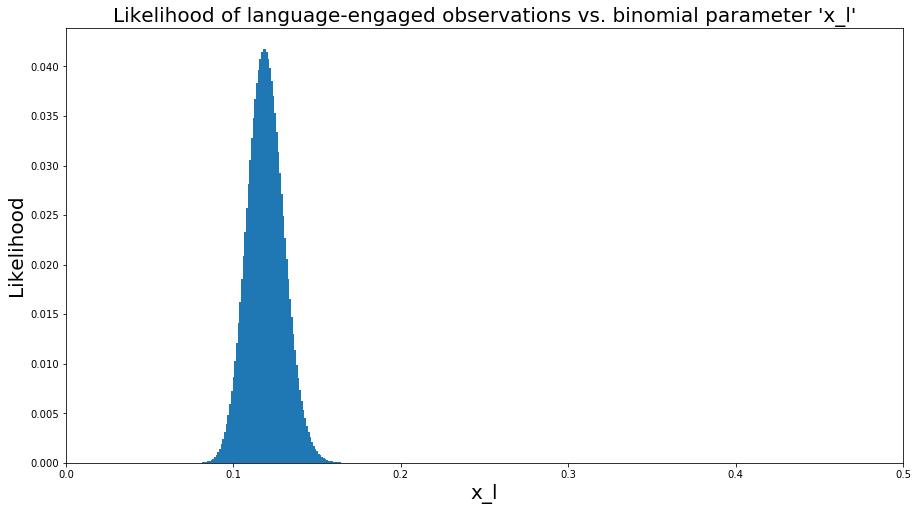

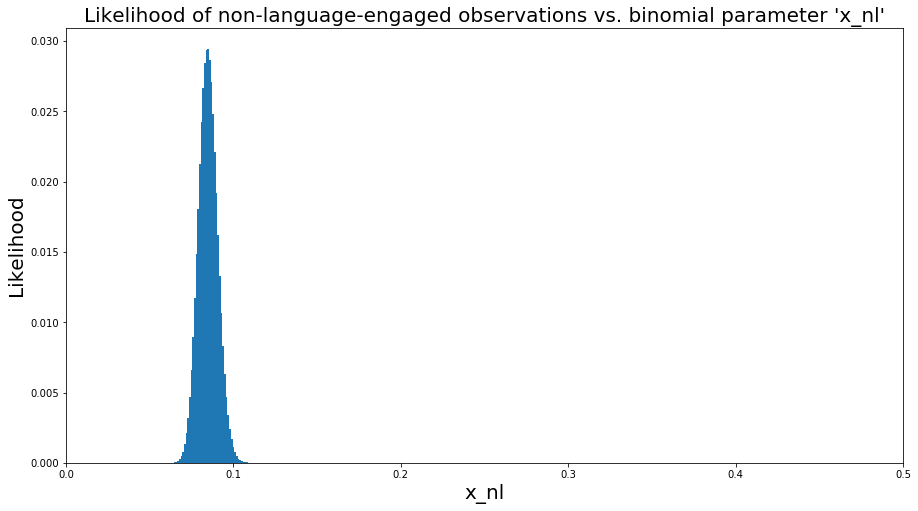

In [60]:
# Plot likelihoods as a bar graph. We will only show p=0:0.5, since
# all values are 0 after 0.5
plt.figure(figsize=(15,8))
plt.bar(x, p_l, width=0.001)
plt.title("Likelihood of language-engaged observations vs. binomial parameter 'x_l'", fontsize=20)
plt.ylabel('Likelihood', fontsize=20)
plt.xlabel('x_l', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

plt.figure(figsize=(15,8))
plt.bar(x, p_nl, width=0.001)
plt.title("Likelihood of non-language-engaged observations vs. binomial parameter 'x_nl'", fontsize=20)
plt.ylabel('Likelihood', fontsize=20)
plt.xlabel('x_nl', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

## (b)

In [21]:
# Find value of x that maximizes each of these 2 likelihood functions
ind_max_l = np.argmax(p_l)
ind_max_nl = np.argmax(p_nl)
x_max_l = x[ind_max_l]
x_max_nl = x[ind_max_nl]
print('maximum likelihood x for language-engaged observations: %0.4f' % x_max_l)
print('maximum likelihood x for non-language-engaged observations: %0.4f' % x_max_nl)

maximum likelihood x for language-engaged observations: 0.1190
maximum likelihood x for non-language-engaged observations: 0.0850


In [22]:
# Now compare these to the ML estimator values
print('ML estimate for language-engaged observations: %0.4f' % (103/869))
print('ML estimate for non-language-engaged observations: %0.4f' % (199/2353))

ML estimate for language-engaged observations: 0.1185
ML estimate for non-language-engaged observations: 0.0846


So we see that the p values that maximize our likelihood function are very close to the ML estimates given by formula.

## (c)

What we have computed thus far, for each of the 2 processes, is $P(data \mid x)$ for various $x$ values. To obtain the posteriors $P(x \mid data)$ we must perform Bayesian inference using Bayes rule:

$P(x \mid data) = \frac{P(data \mid x)P(x)}{P(data)} = \frac{P(data \mid x)P(x)}{\sum_{x}P(data \mid x)P(x)}$

In [26]:
def posterior(likelihoods, i):
    """
    Computes the posterior P(x | data) for a particular parameter value x. 
    The inputs are 1) the vector of likelihoods for a grid of different
    parameter values, and 2) the index where the desired parameter value
    is found in the likelihood array.
    """
    # Assume a uniform prior over all parameter values 'x'. Since we have
    # 1001 values in our grid, this means each has a p_x of 1/1001.
    p_x = 1/1001
    # Compute P(data). Since all p_x have equal value, this can be done
    # by computing the mean of the likelihood vector.
    norm = np.mean(likelihoods)
    
    return likelihoods[i]*p_x/norm

In [27]:
post_l = [posterior(p_l, i) for i in range(len(p_l))]
post_nl = [posterior(p_nl, i) for i in range(len(p_nl))]

In [28]:
def compute_cdf(pdf):
    """
    A function to compute the CDF for a given discrete PDF. Accumulates
    the PDF values.
    """
    acc = 0
    cdf = []
    for p in pdf:
        cdf.append(acc)
        acc += p
        
    return cdf

In [29]:
cdf_l = compute_cdf(post_l)
cdf_nl = compute_cdf(post_nl)

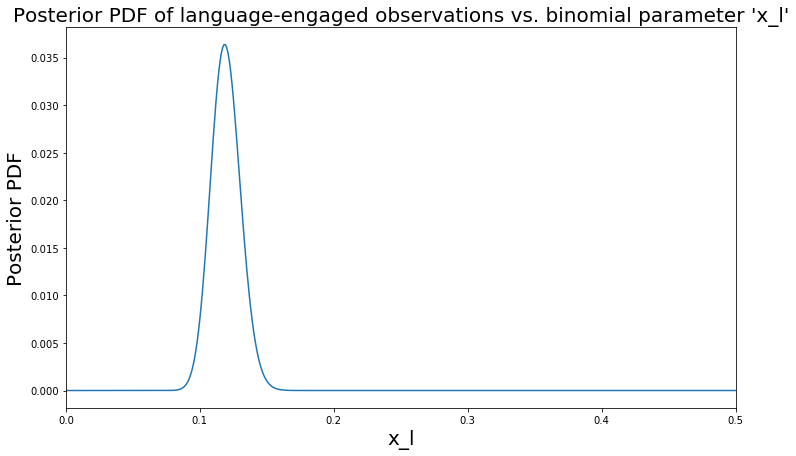

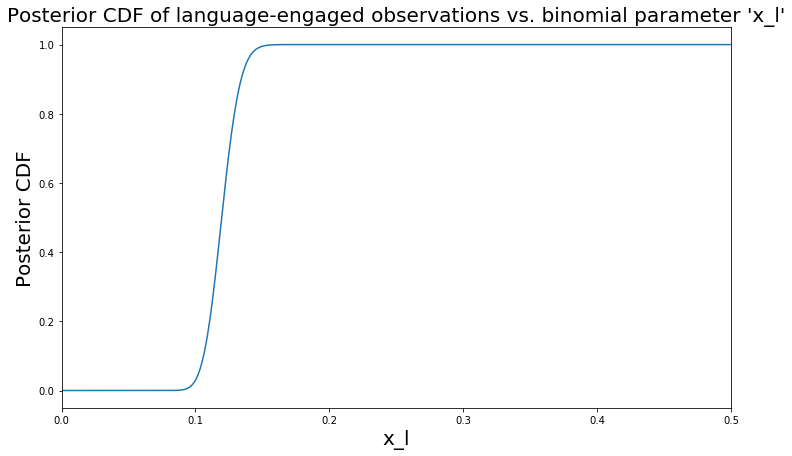

In [61]:
# Plot Posterior PDF for the language-engaged process. We will 
# only show p=0:0.5, since all values are 0 after 0.5
plt.figure(figsize=(12,7))
plt.plot(x, post_l)
plt.title("Posterior PDF of language-engaged observations vs. binomial parameter 'x_l'", fontsize=20)
plt.ylabel('Posterior PDF', fontsize=20)
plt.xlabel('x_l', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

# Plot Posterior CDF for the language-engaged process. We will 
# only show p=0:0.5, since all values are 0 after 0.5
plt.figure(figsize=(12,7))
plt.plot(x, cdf_l)
plt.title("Posterior CDF of language-engaged observations vs. binomial parameter 'x_l'", fontsize=20)
plt.ylabel('Posterior CDF', fontsize=20)
plt.xlabel('x_l', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

The $95\%$ confidence interval is the symmetric range around the mean of the posterior where $95\%$ of the probability lies. To find this, we must find the range [0.025 - 0.975] of the CDF:

In [56]:
start_i = np.argmin(np.abs(np.asarray(cdf_l) - 0.025))
end_i = np.argmin(np.abs(np.asarray(cdf_l) - 0.975))
print("The 95%% confidence interval is x = [%0.3f - %0.3f]" % (x[start_i], x[end_i]))

The 95% confidence interval is x = [0.099 - 0.142]


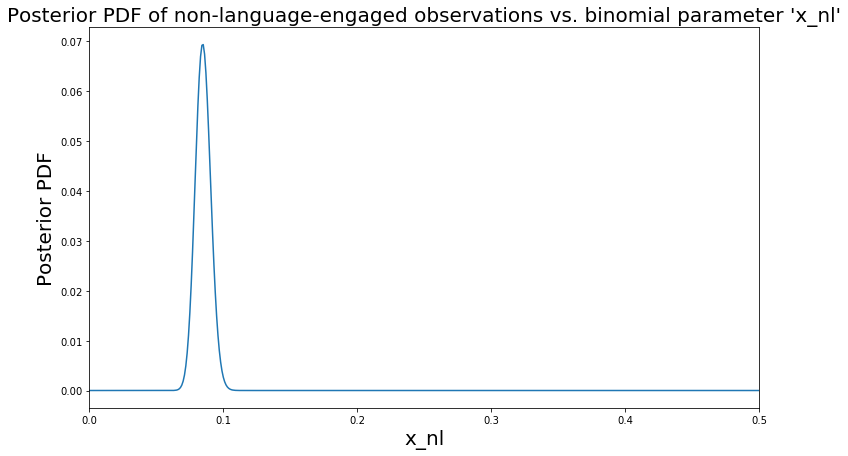

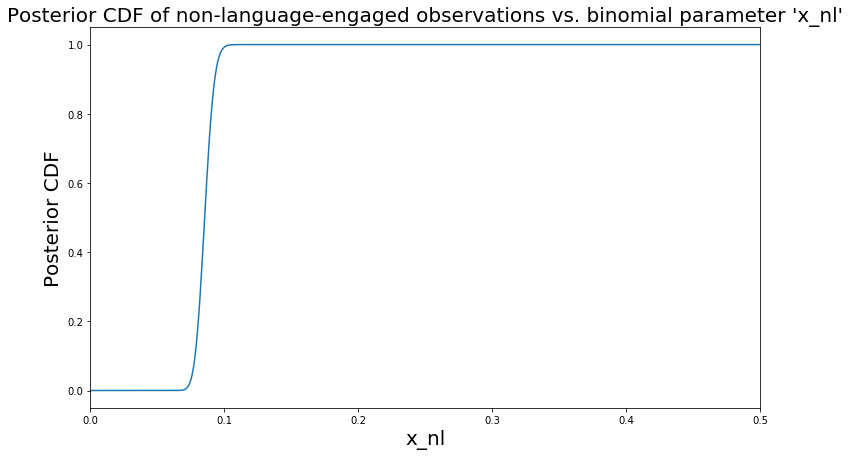

In [62]:
# Plot Posterior PDF for the non-language-engaged process. We will 
# only show p=0:0.5, since all values are 0 after 0.5
plt.figure(figsize=(12,7))
plt.plot(x, post_nl)
plt.title("Posterior PDF of non-language-engaged observations vs. binomial parameter 'x_nl'", fontsize=20)
plt.ylabel('Posterior PDF', fontsize=20)
plt.xlabel('x_nl', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

# Plot Posterior CDF for the non-language-engaged process. We will 
# only show p=0:0.5, since all values are 0 after 0.5
plt.figure(figsize=(12,7))
plt.plot(x, cdf_nl)
plt.title("Posterior CDF of non-language-engaged observations vs. binomial parameter 'x_nl'", fontsize=20)
plt.ylabel('Posterior CDF', fontsize=20)
plt.xlabel('x_nl', fontsize=20)
plt.xlim(0, 0.5)
plt.show()

The $95\%$ confidence interval is the symmetric range around the mean of the posterior where $95\%$ of the probability lies. To find this, we must find the range [0.025 - 0.975] of the CDF:

In [58]:
start_i = np.argmin(np.abs(np.asarray(cdf_nl) - 0.025))
end_i = np.argmin(np.abs(np.asarray(cdf_nl) - 0.975))
print("The 95%% confidence interval is x = [%0.3f - %0.3f]" % (x[start_i], x[end_i]))

The 95% confidence interval is x = [0.074 - 0.097]


## (d)

In [97]:
# As the problem tells us, the joint posterior is given by the 
# outer product of the two marginals
post_joint = np.outer(post_nl, post_l)

In [107]:
def imagesc(C, tick_locations, tick_values, title, size):
    """
    A function to replicate matlab's 'imagesc' function.
    """
    # Plot it out
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(C, cmap='RdBu_r')

    # Format
    fig = plt.gcf()
    fig.set_size_inches(size[0], size[1])

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_xticks(tick_locations, minor=False)
    ax.set_yticks(tick_locations, minor=False)

    # set values for x and y axis ticks
    ax.set_xticklabels(tick_values)
    ax.set_yticklabels(tick_values)

    # turn off grid mode
    ax.grid(False)
    
    # set plot title and axis labels
    ax.set_title(title, fontsize=20, y = 1.03)
    ax.set_xlabel('x_l', fontsize=20)
    ax.set_ylabel('x_nl', fontsize=20)
    
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Joint posterior probability', rotation=270, fontsize=20, labelpad=25)

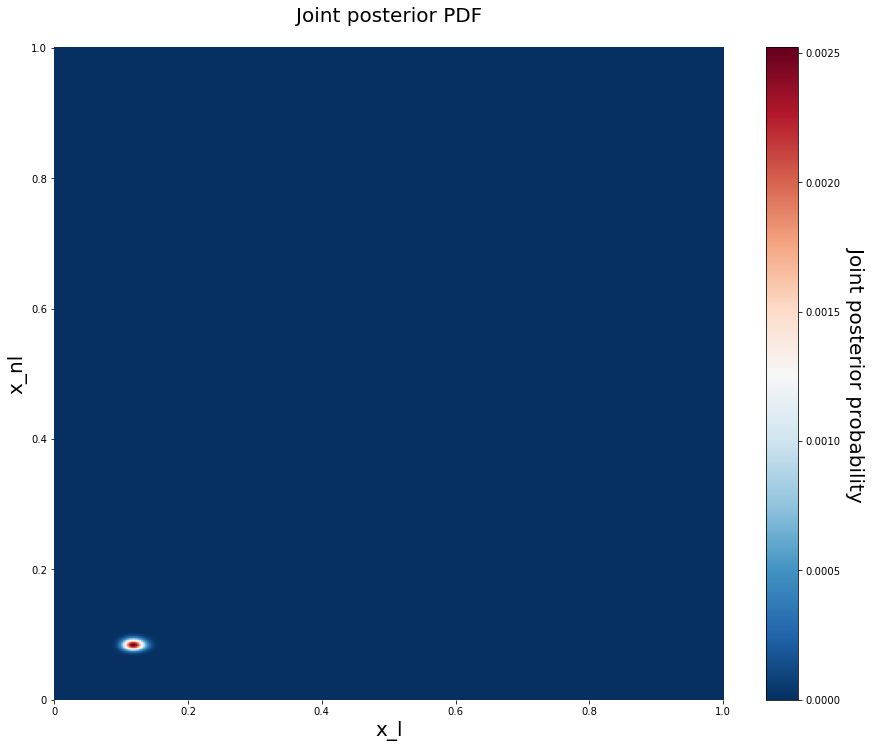

In [109]:
# Let's begin by plotting the 2-D joint posterior as a heatmap
imagesc(
    post_joint, 
    tick_locations=[0, 200, 400, 600, 800, 1000],
    tick_values=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    title='Joint posterior PDF', 
    size=(15, 12)
)

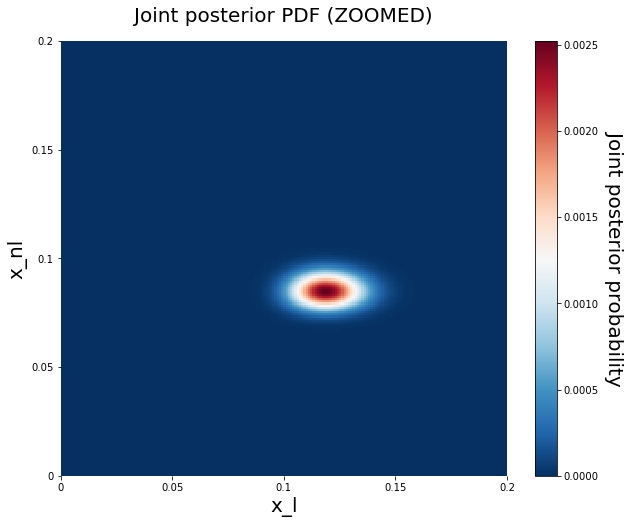

In [111]:
# Zoom in on the non-zero zone
imagesc(
    post_joint[:200, :200], 
    tick_locations=[0, 50, 100, 150, 200],
    tick_values=[0, 0.05, 0.1, 0.15, 0.2],
    title='Joint posterior PDF (ZOOMED)', 
    size=(10, 8)
)

In [131]:
# Compute posterior probability that x_l > x_nl by summing the
# appropriate entries of the joint distribution
p_xl_larger_xnl = 0
for i in range(1001):
    for j in range(0,i):
        p_xl_larger_xnl += post_joint[j, i]

In [133]:
print('Posterior probability that x_l > x_nl: %0.4f' % p_xl_larger_xnl)
print('Posterior probability that x_l <= x_nl: %0.4f' % (1 - p_xl_larger_xnl))

Posterior probability that x_l > x_nl: 0.9979
Posterior probability that x_l <= x_nl: 0.0021


## (e)

Our estimates from part (b) are $x_l = 0.119$ and $x_{nl} = 0.085$. Thus, we have that

$A \mid L\sim Bernoulli(0.119)$, and

$A \mid NL\sim Bernoulli(0.085)$.

We are also given prior probabilties P(L) = P(NL) = 0.5. We would like to compute the posterior $P(L \mid A)$. To do so, we use Baye's rule:

$
P(L \mid A) = \frac{P(A \mid L)P(L)}{P(A)} 
= \frac{P(A \mid L)P(L)}{P(A \mid L)P(L) + P(A \mid NL)P(NL)}
= \frac{0.119*0.5}{0.119*0.5 + 0.085*0.5}
= 0.583.
$

I think this result merits Poldrack's critique. The probability of language engagement given that we've observed activation in Broca's area is just barely over $50\%$. This means that observing activity in Broca's area tells us very little about whether or not language is engaged. We cannot say with high confidence that language is active given that we've observed activity in Broca's area, and we also cannot say with high confidence that language is unactive given this observation. So we are really not confident about any inference regarding language activity from this observation.

# Problem #3

In [2]:
import scipy.io as sio

D = sio.loadmat('psychopathy.mat')['DATA']
print(D.shape)

(70, 3)


## (a)

First, let's copy over my code for polynomial regression from HW2

In [87]:
def svd(matrix):
    """
    A wrapper for numpy's SVD because numpy returns 
    singular values as an array (weird).
    """
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

def sharp(S):
    """
    A function to convert S into S^# (S_sharp). S_sharp is a 
    diagonal matrix whose mth diagonal element is 1/S_mm. It
    has the shape of S^T.
    """
    S_sharp = np.zeros_like(S)
    n_row, n_col = S.shape
    for r in range(n_row):
        for c in range(n_col):
            if S[r,c] != 0:
                S_sharp[r,c] = 1/S[r,c]
    return S_sharp.T

def polynomial_regression(x, y, order):
    """
    A function to solve the polynomial least-squares regression
    problem for an arbitrary polynomial order.
    """
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    # Create the matrix X by concatenating x column vectors of different orders
    cols = [np.power(x, i) for i in range(order+1)]
    X = np.hstack(cols)
    # Obtain SVD decomposition of X
    U, S, Vh = svd(X)
    # Compute B_opt_star
    y_star = np.matmul(U.T, y)
    S_sharp = sharp(S)
    B_opt_star = np.matmul(S_sharp, y_star)
    # Convert B_opt_star into B_opt by reversing the Vh transformation
    B_opt = np.matmul(Vh.T, B_opt_star)
    
    return B_opt

def compute_MSE(x, y, B_opt):
    """
    Compute MSE for a particular polynomial fit
    """
    y_p = 0
    for i, B in enumerate(B_opt):
        y_p += B*np.power(x, i)
    
    return np.mean(np.square(y - y_p))

def plot_fit(x, y, B_opt, x_range=None, y_range=None, figsize=None, 
             x_label='x', y_label='y', title='Model fit'):
    """
    A function to plot the fit for a given polynomial LS solution.
    """
    if x_range is not None:
        x_fit = np.linspace(x_range[0], x_range[1], 30).reshape(-1, 1)
    else:
        x_fit = np.linspace(np.min(x), np.max(x), 30).reshape(-1, 1)
    y_fit = 0
    for i, B in enumerate(B_opt):
        y_fit += B*np.power(x_fit, i)
    if figsize is not None:
        plt.figure(figsize=figsize)
    else:
        plt.figure(figsize=(11, 8))
    plt.title(title, fontsize=22)
    plt.xlabel(x_label, fontsize=22)
    plt.ylabel(y_label, fontsize=22)
    plt.scatter(x, y)
    plt.plot(x_fit, y_fit, color='r')
    if x_range is not None:
        plt.xlim(x_range[0], x_range[1])
    if y_range is not None:
        plt.ylim(y_range[0], y_range[1])
    plt.show()

Now, I will build functions to perform cross-validation:

In [95]:
def get_K_folds(x, y, K):
    """
    Takes a dataset of values, 'x' and 'y', and splits the
    dataset into 'K' random folds for cross-validation. Returns
    the data folds as a list of (x, y) tuples; the list has
    length 'K'.
    """
    # These should have equal length
    assert len(x) == len(y)
    # Since the dataset is being divided into K folds, there
    # will be len(x)/K samples in each fold.
    nb_test = round(len(x)/K)
    test_sets = []
    train_sets = []
    # Lets randomly permute the samples before we obtain our folds
    ind_options = list(range(len(x)))
    inds = np.random.permutation(ind_options)
    # Now, step through the indices and build the data folds
    for i in range(K):
        # First fold is 0:nb_test, next is nb_test:2*nb_test, etc...
        test_inds = inds[i*nb_test:(i+1)*nb_test]
        train_inds = set(ind_options).difference(test_inds)
        train_inds = np.asarray(list(train_inds))
        test_sets.append((x[test_inds], y[test_inds]))
        train_sets.append((x[train_inds], y[train_inds]))
        
    return train_sets, test_sets
        
def cross_validate_polynomial(train_sets, test_sets, orders):
    """
    Takes the data folds, 'train_sets' and 'test_sets', and
    computes cross-validation scores for each polynomial parameter
    in the list 'orders'. Returns the scores as a dictionary.
    """
    param_scores = {}
    for o in orders:
        scores = []
        for train, test in zip(train_sets, test_sets):
            # Fit the polynomial to the training data
            B_opt = polynomial_regression(train[0], train[1], order=o)
            # Evaluate it on the test data
            score = compute_MSE(test[0], test[1], B_opt)
#             plot_fit(
#                 train[0], train[1], B_opt, 
#                 x_range=[-3,3], y_range=[0, 40], 
#                 figsize=(8,6), title='Train set fit'
#             )
#             plot_fit(
#                 test[0], test[1], B_opt, 
#                 x_range=[-3,3], y_range=[0, 40], 
#                 figsize=(8,6), title='Test set eval'
#             )
#             print('Test set MSE: %0.2f \n\n' % score)
            scores.append(score)
        param_scores[o] = np.mean(scores)
    
    return param_scores

In [92]:
# Let's compute CV scores for 5-fold CV
train_sets, test_sets = get_K_folds(D[:,0], D[:,1], K=5)
param_scores = cross_validate_polynomial(train_sets, test_sets, orders=range(15))
param_scores

{0: 62.529209183673473,
 1: 39.337798980306609,
 2: 40.324331837600923,
 3: 38.221648843191851,
 4: 50.585754616821561,
 5: 40.421419859147875,
 6: 89.68551196415055,
 7: 213.65710312141132,
 8: 42.878482557959472,
 9: 44325.552357302739,
 10: 1142541.9171819838,
 11: 812268.47531007533,
 12: 39875820.656703092,
 13: 7670441.0278546978,
 14: 20569420.691559337}

So we see that our best fit (smallest MSE) is found w/ a polynomial of order 3. Let's try fitting it to the whole dataset and take a look:

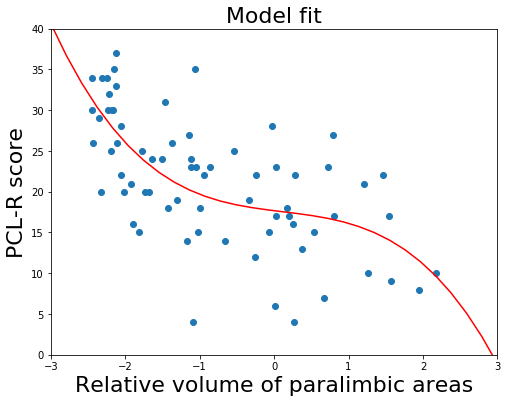

In [103]:
B_opt = polynomial_regression(D[:,0], D[:,1], order=3)
plot_fit(
    D[:,0], D[:,1], B_opt, 
    x_range=[-3,3], y_range=[0, 40], 
    x_label='Relative volume of paralimbic areas',
    y_label='PCL-R score',
    figsize=(8,6)
)

## (b)

In [26]:
# Get the indices of the treated and untreated prisoners
inds_untreated = np.where(D[:,2] == 0)[0]
inds_treated = np.where(D[:,2] == 1)[0]
# Get paralimbic volumes for each of the 2 types
volumes_untreated = D[inds_untreated, 0]
volumes_treated = D[inds_treated, 0]
# Get PCL-R scores for each of the 2 types
pclr_untreated = D[inds_untreated, 1]
pclr_treated = D[inds_treated, 1]

In [29]:
def bootstrap_estimate_95c(x, sample_size, nb_trials):
    """
    Given a set of samples 'x', compute means for 'nb_trials'
    bootstrap samples of 'sample_size' randomly drawn samples
    for each. Then, use the mean and std-dev of the means to
    compute the 95% CI.
    """
    means = np.zeros(nb_trials)
    for i in range(nb_trials):
        x_i = np.random.choice(x, size=sample_size, replace=True)
        means[i] = np.mean(x_i)
    
    avg = np.mean(means)
    std = np.std(means)
    return [avg - 2*std, avg + 2*std]

In [28]:
interval_treated = bootstrap_estimate_95c(volumes_treated, sample_size=35, nb_trials=100000)
interval_untreated = bootstrap_estimate_95c(volumes_untreated, sample_size=35, nb_trials=100000)
print('95% confidence interval for treated prisoners: ', interval_treated)
print('95% confidence interval for untreated prisoners: ', interval_untreated)

95% confidence interval for treated prisoners:  [-1.4198714035906113, -0.6913771914284671]
95% confidence interval for untreated prisoners:  [-1.1014677055981783, -0.16739253051246861]


In [30]:
np.mean(interval_treated)

-1.0556242975095391

Yes, the confidence intervals overlap, indicating that the random assignment worked. And yes, these data suggest that there is a statistically reliable difference to the general population in terms of paralimbic volume. Since the data values are relative to the population median, a value of 0 signifies this median. We see that the value 0 is not in the 95% CI for either the untreated or treated prisoners. This suggests that both populations of prisoners deviate from the general population enough to be considered statistically significant.

## (c)

Let's use a standard mean comparison test to evaluate whether therapy has an effect on PCL-R score. Denoting the means of the PCL-R scores for untreated prisoners as $\bar{x_0}$ and for treated prisoners as $\bar{x_1}$. Our t-test value is then:

$t = \frac{\bar{x_1} - \bar{x_0}}{2}$



## (d)

In [6]:
inds_untreated.shape

(35,)